In [1]:
from image_processors import *

/home/fyp/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Namespace(model='encnet', backbone='clip_vitl16_384', dataset='fss', workers=16, base_size=520, crop_size=480, train_split='train', aux=False, se_loss=False, se_weight=0.2, batch_size=16, test_batch_size=16, no_cuda=False, seed=1, weights='/home/fyp/lang-seg/checkpoints/demo_e200.ckpt', eval=False, acc_bn=False, test_val=False, no_val=False, module='clipseg_DPT_test_v2', scale_inv=False, widehead=True, widehead_hr=False, ignore_index=255, jobname='default', strict=True, use_pretrained='True', arch_option=0, nshot=0, fold=0, nworker=0, bsz=1, benchmark='pascal', datapath='data/Datasets_HSN', activation='relu', cuda=True)
Loading model...


/home/fyp/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/migration/migration.py:208: You have multiple `ModelCheckpoint` callback states in this checkpoint, but we found state keys that would end up colliding with each other after an upgrade, which means we can't differentiate which of your checkpoint callbacks needs which states. At least one of your `ModelCheckpoint` callbacks will not be able to reload the state.
Lightning automatically upgraded your loaded checkpoint from v1.3.5 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint checkpoints/demo_e200.ckpt`
/home/fyp/lang-seg/modules/lsegmentation_module_zs.py:50: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = amp.GradScaler(enabled=self.enabled)

:=========== Few-shot Seg. with HSNet ===========
|             datapath: data/Datasets_HSN       
|       

use norm: [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]
['ac_wall', 'acorn', 'adhensive_tape', 'adidas_logo1', 'adidas_logo2', 'afghan_hound', 'african_elephant', 'african_grey', 'agama', 'air_strip', 'aircraft_carrier', 'airedale', 'airship', 'almond', 'ambulance', 'american_staffordshire', 'anemone_fish', 'angora', 'apple', 'armour', 'ashtray', 'assult_rifle', 'aubergine', 'avocado', 'baboon', 'backpack', 'bagel', 'balance_weight', 'bald_eagle', 'ballpoint', 'banana', 'band-aid', 'banded_gecko', 'barometer', 'baseball_bat', 'baseball_player', 'basketball', 'bassoon', 'bathtub', 'battery', 'beacon', 'beaker', 'beam_bridge', 'bear', 'beaver', 'bedlington_terrier', 'bee_house', 'besom', 'birdhouse', 'bison', 'black_grouse', 'black_stork', 'black_swan', 'blossom_card', 'boa_constrictor', 'bolotie', 'bomb', 'border_terrier', 'boston_bull', 'bottle_cap', 'bouzouki', 'box_turtle', 'bra', 'bracelet', 'bradypod', 'brain_coral', 'brambling', 'brasscica', 'brick', 'brick_card', 'brick_tea', 'briefcase', 'br

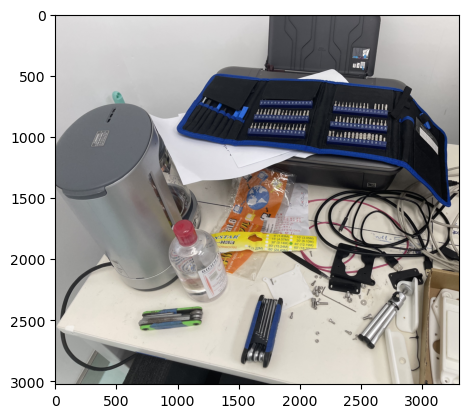

(3300, 3024)


In [2]:
from PIL import Image
image_sample = Image.open("/home/fyp/Pictures/TestSeg/MessyTable.jpg")
import matplotlib.pyplot as plt
plt.imshow(image_sample)
plt.show()
# print(image_sample.size)
print(image_sample.size)

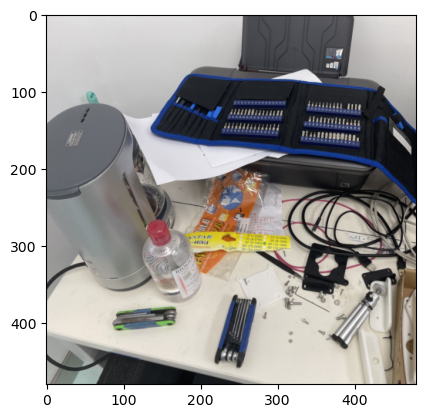

In [3]:
lsfip = LSegFeatImageProcessor()
feat_pixel_pairs = lsfip.get_feat_pixel_pair(image_sample, n_pca_components=40, n_clusters=360)

feat_list = [feat for feat, pixel in feat_pixel_pairs]
image = lsfip.current_image
# image dimension (3, 480, 480), need to change
image = image.permute(1, 2, 0)
plt.imshow(image)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


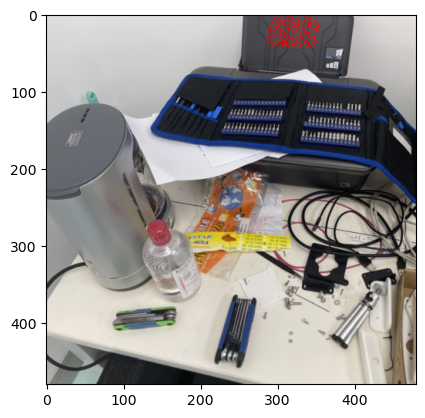

In [5]:
import copy
text_feat = lseg_model.encode_text("man")
ind = max_sim_feature_index(list_of_features=feat_list, text_feat=text_feat)
pixels = feat_pixel_pairs[ind][1]
new_image = copy.deepcopy(lsfip.current_image.permute(1, 2, 0))
for i in range(len(pixels[1])):
    new_image[pixels[0][i], pixels[1][i]] = torch.tensor([250, 0, 0])
plt.imshow(new_image)
plt.show()


In [8]:
text_feat

tensor([[ 1.1070e-02,  3.1403e-02,  2.3300e-02,  2.0340e-02, -3.1033e-03, -6.4850e-03,  1.3227e-03, -2.5040e-02,  4.9057e-03,  3.4790e-02, -2.4963e-02, -4.4136e-03,  1.0841e-02, -2.1362e-02,  2.6047e-02,  1.2817e-02,  5.3162e-02,  1.9516e-02, -5.0125e-03, -2.7237e-02,  2.9999e-02,  3.8788e-02,  3.1114e-04, -9.4070e-03,
         -6.2675e-03,  2.3239e-02,  8.0414e-03, -8.0261e-03,  1.6006e-02,  8.0919e-04,  7.3814e-03, -1.8051e-02, -1.8021e-02, -1.3313e-02,  8.1863e-03,  7.0114e-03,  1.4343e-02,  4.1351e-03,  5.1537e-03,  1.0864e-02, -2.7435e-02,  6.8474e-03, -1.4244e-02,  1.6617e-02,  2.7084e-02,  4.8706e-02,  1.2489e-02,  7.9193e-03,
         -3.0174e-03, -3.1052e-03,  1.4862e-02,  4.2206e-02,  2.4529e-03, -8.7433e-03, -1.6922e-02, -2.8732e-02, -1.3161e-02,  2.6810e-02,  1.4450e-02, -1.4587e-02,  2.8503e-02, -8.8806e-03,  2.0386e-02, -2.0813e-02,  1.5350e-02, -2.7634e-02, -1.6083e-02,  3.6560e-02,  4.3750e-05, -1.5388e-02, -5.5771e-03, -1.9836e-03,
          5.0659e-03,  1.2560e-03,  1

In [9]:
ft = feat_list[ind]

In [13]:
ft.half() @ text_feat.t()

tensor([0.8843], device='cuda:0', dtype=torch.float16, grad_fn=<SqueezeBackward4>)

In [ ]:
tf = encode_text("anc")

In [18]:
tf[0] @ text_feat[0].t()

tensor(0.8887, device='cuda:0', dtype=torch.float16, grad_fn=<DotBackward0>)